In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from scipy import stats

In [3]:
#Hypothesis Testing: Is there a difference in the number of Covid-19 cases between blue and red states?

#Null Hypothesis: There is no difference in the mean of number of Covid-19 cases between blue and red states. 

stateCases = pd.read_csv('./datasets/covid-cases-data/United_States_COVID-19_Cases_and_Deaths_by_State_over_Time.csv') 
#print(stateCases)

stateMeta = pd.read_csv('./datasets/covid-state-data-agg/COVID19_state.csv')
#print(stateMeta)

#Blue Red States is based on year 2020
BRStates = pd.read_csv('./datasets/BlueRedStates.csv')
#print(BRStates)

stateMeta = stateMeta.merge(BRStates, left_on='State', right_on='stateName')
#print(stateMeta)

#Gather only covid cases in the year 2020
stateCases['submission_date'] = pd.to_datetime(stateCases.submission_date, format='%m/%d/%Y')

stateCases2020 = stateCases[stateCases['submission_date'].dt.year == 2020]
#print(stateCases2020)

#Create 2 dataframes one on blue states and the other on red states 
blueCode = BRStates[BRStates['BlueRed'] == 'B'].stateCode
redCode = BRStates[BRStates['BlueRed'] == 'R'].stateCode

In [4]:
#8625 blue entries
blueStates = stateCases2020[stateCases2020['state'].isin(blueCode)]
#print(blueStates)
NYC = stateCases2020[stateCases2020['state'] == 'NYC']['new_case'].sum()

blueStatesTot = blueStates.groupby('state')['new_case'].sum()
blueStatesTot['NY'] = blueStatesTot['NY'] + NYC 
blueStatesPop = stateMeta[stateMeta['stateCode'].isin(blueCode)]['Population']
blueStates = pd.DataFrame({'state code': blueStatesTot.index, 'total cases': blueStatesTot.values, 'population': blueStatesPop})

#Normalize each state by its population
blueStates['case ratio'] = blueStates['total cases'] / blueStates['population']

In [5]:
#8280 red entries
redStates = stateCases2020[stateCases2020['state'].isin(redCode)]
#print(redStates)

redStatesTot = redStates.groupby('state')['new_case'].sum()
redStatesPop = stateMeta[stateMeta['stateCode'].isin(redCode)]['Population']
redStates = pd.DataFrame({'state code': redStatesTot.index, 'total cases': redStatesTot.values, 'population': redStatesPop})

#Normalize each state by its population
redStates['case ratio'] = redStates['total cases'] / redStates['population']

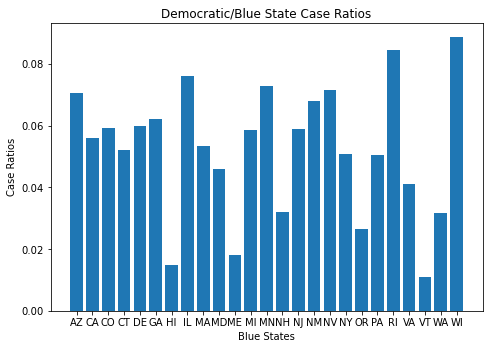

   state code  total cases  population  case ratio
3          AZ     520559.0     7378494    0.070551
4          CA    2231552.0    39937489    0.055876
5          CO     347198.0     5845526    0.059396
6          CT     185708.0     3563077    0.052120
7          DE      58847.0      982895    0.059871
9          GA     666452.0    10736059    0.062076
10         HI      21026.0     1412687    0.014884
13         IL     963389.0    12659682    0.076099
18         MA     373473.0     6976597    0.053532
19         MD     280219.0     6083116    0.046065
20         ME      24201.0     1345790    0.017983
21         MI     589728.0    10045029    0.058708
22         MN     415302.0     5700671    0.072851
29         NH      44028.0     1371246    0.032108
30         NJ     527784.0     8936574    0.059059
31         NM     142864.0     2096640    0.068139
32         NV     224731.0     3139658    0.071578
33         NY     990626.0    19440469    0.050957
36         OR     113909.0     

In [6]:
#plt.plot(blueStates['state code'], blueStates['case ratio'], '-o')
fig = plt.figure(1)
ax = fig.add_axes([0,0,1,1])
ax.bar(blueStates['state code'], blueStates['case ratio'])
plt.title('Democratic/Blue State Case Ratios')
plt.xlabel('Blue States')
plt.ylabel('Case Ratios')
plt.show()
print(blueStates)

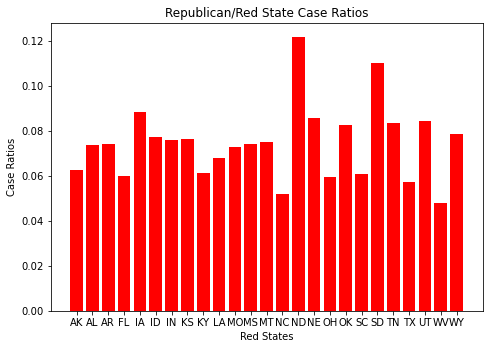

   state code  total cases  population  case ratio
0          AK      45771.0      734002    0.062358
1          AL     362094.0     4908621    0.073767
2          AR     225138.0     3038999    0.074083
8          FL    1318256.0    21992985    0.059940
11         IA     280669.0     3179849    0.088265
12         ID     141077.0     1826156    0.077254
14         IN     511698.0     6745354    0.075859
15         KS     222433.0     2910357    0.076428
16         KY     275530.0     4499692    0.061233
17         LA     315275.0     4645184    0.067871
23         MO     449569.0     6169270    0.072872
24         MS     221928.0     2989260    0.074242
25         MT      81555.0     1086759    0.075044
26         NC     550145.0    10611862    0.051842
27         ND      92770.0      761723    0.121790
28         NE     167233.0     1952570    0.085648
34         OH     700380.0    11747694    0.059619
35         OK     325524.0     3954821    0.082311
39         SC     317350.0     

In [7]:
#plt.plot(redStates['state code'], redStates['case ratio'], '-ro')
fig = plt.figure(2)
ax = fig.add_axes([0,0,1,1])
ax.bar(redStates['state code'], redStates['case ratio'], color = 'r')
plt.title('Republican/Red State Case Ratios')
plt.xlabel('Red States')
plt.ylabel('Case Ratios')
plt.show()
print(redStates)

In [9]:
#Run an independent t-test on the two populations/groups to check whether or not there is a difference in their means 
stats.ttest_ind(blueStates['case ratio'], redStates['case ratio'])
#the p-value < 0.05 

Ttest_indResult(statistic=-4.086588191517973, pvalue=0.00016557577918043718)